<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


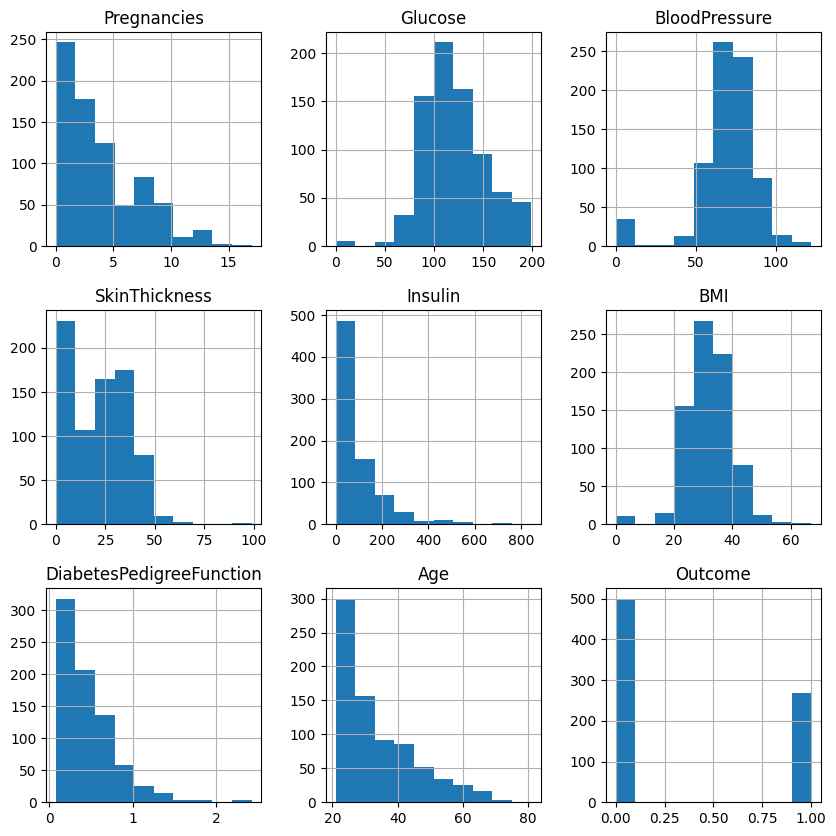

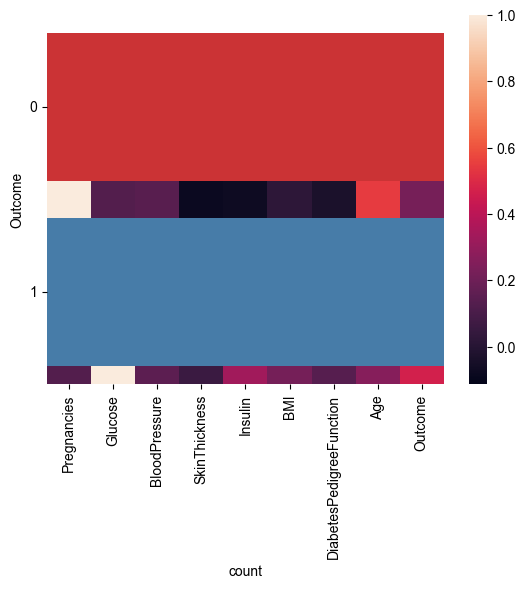

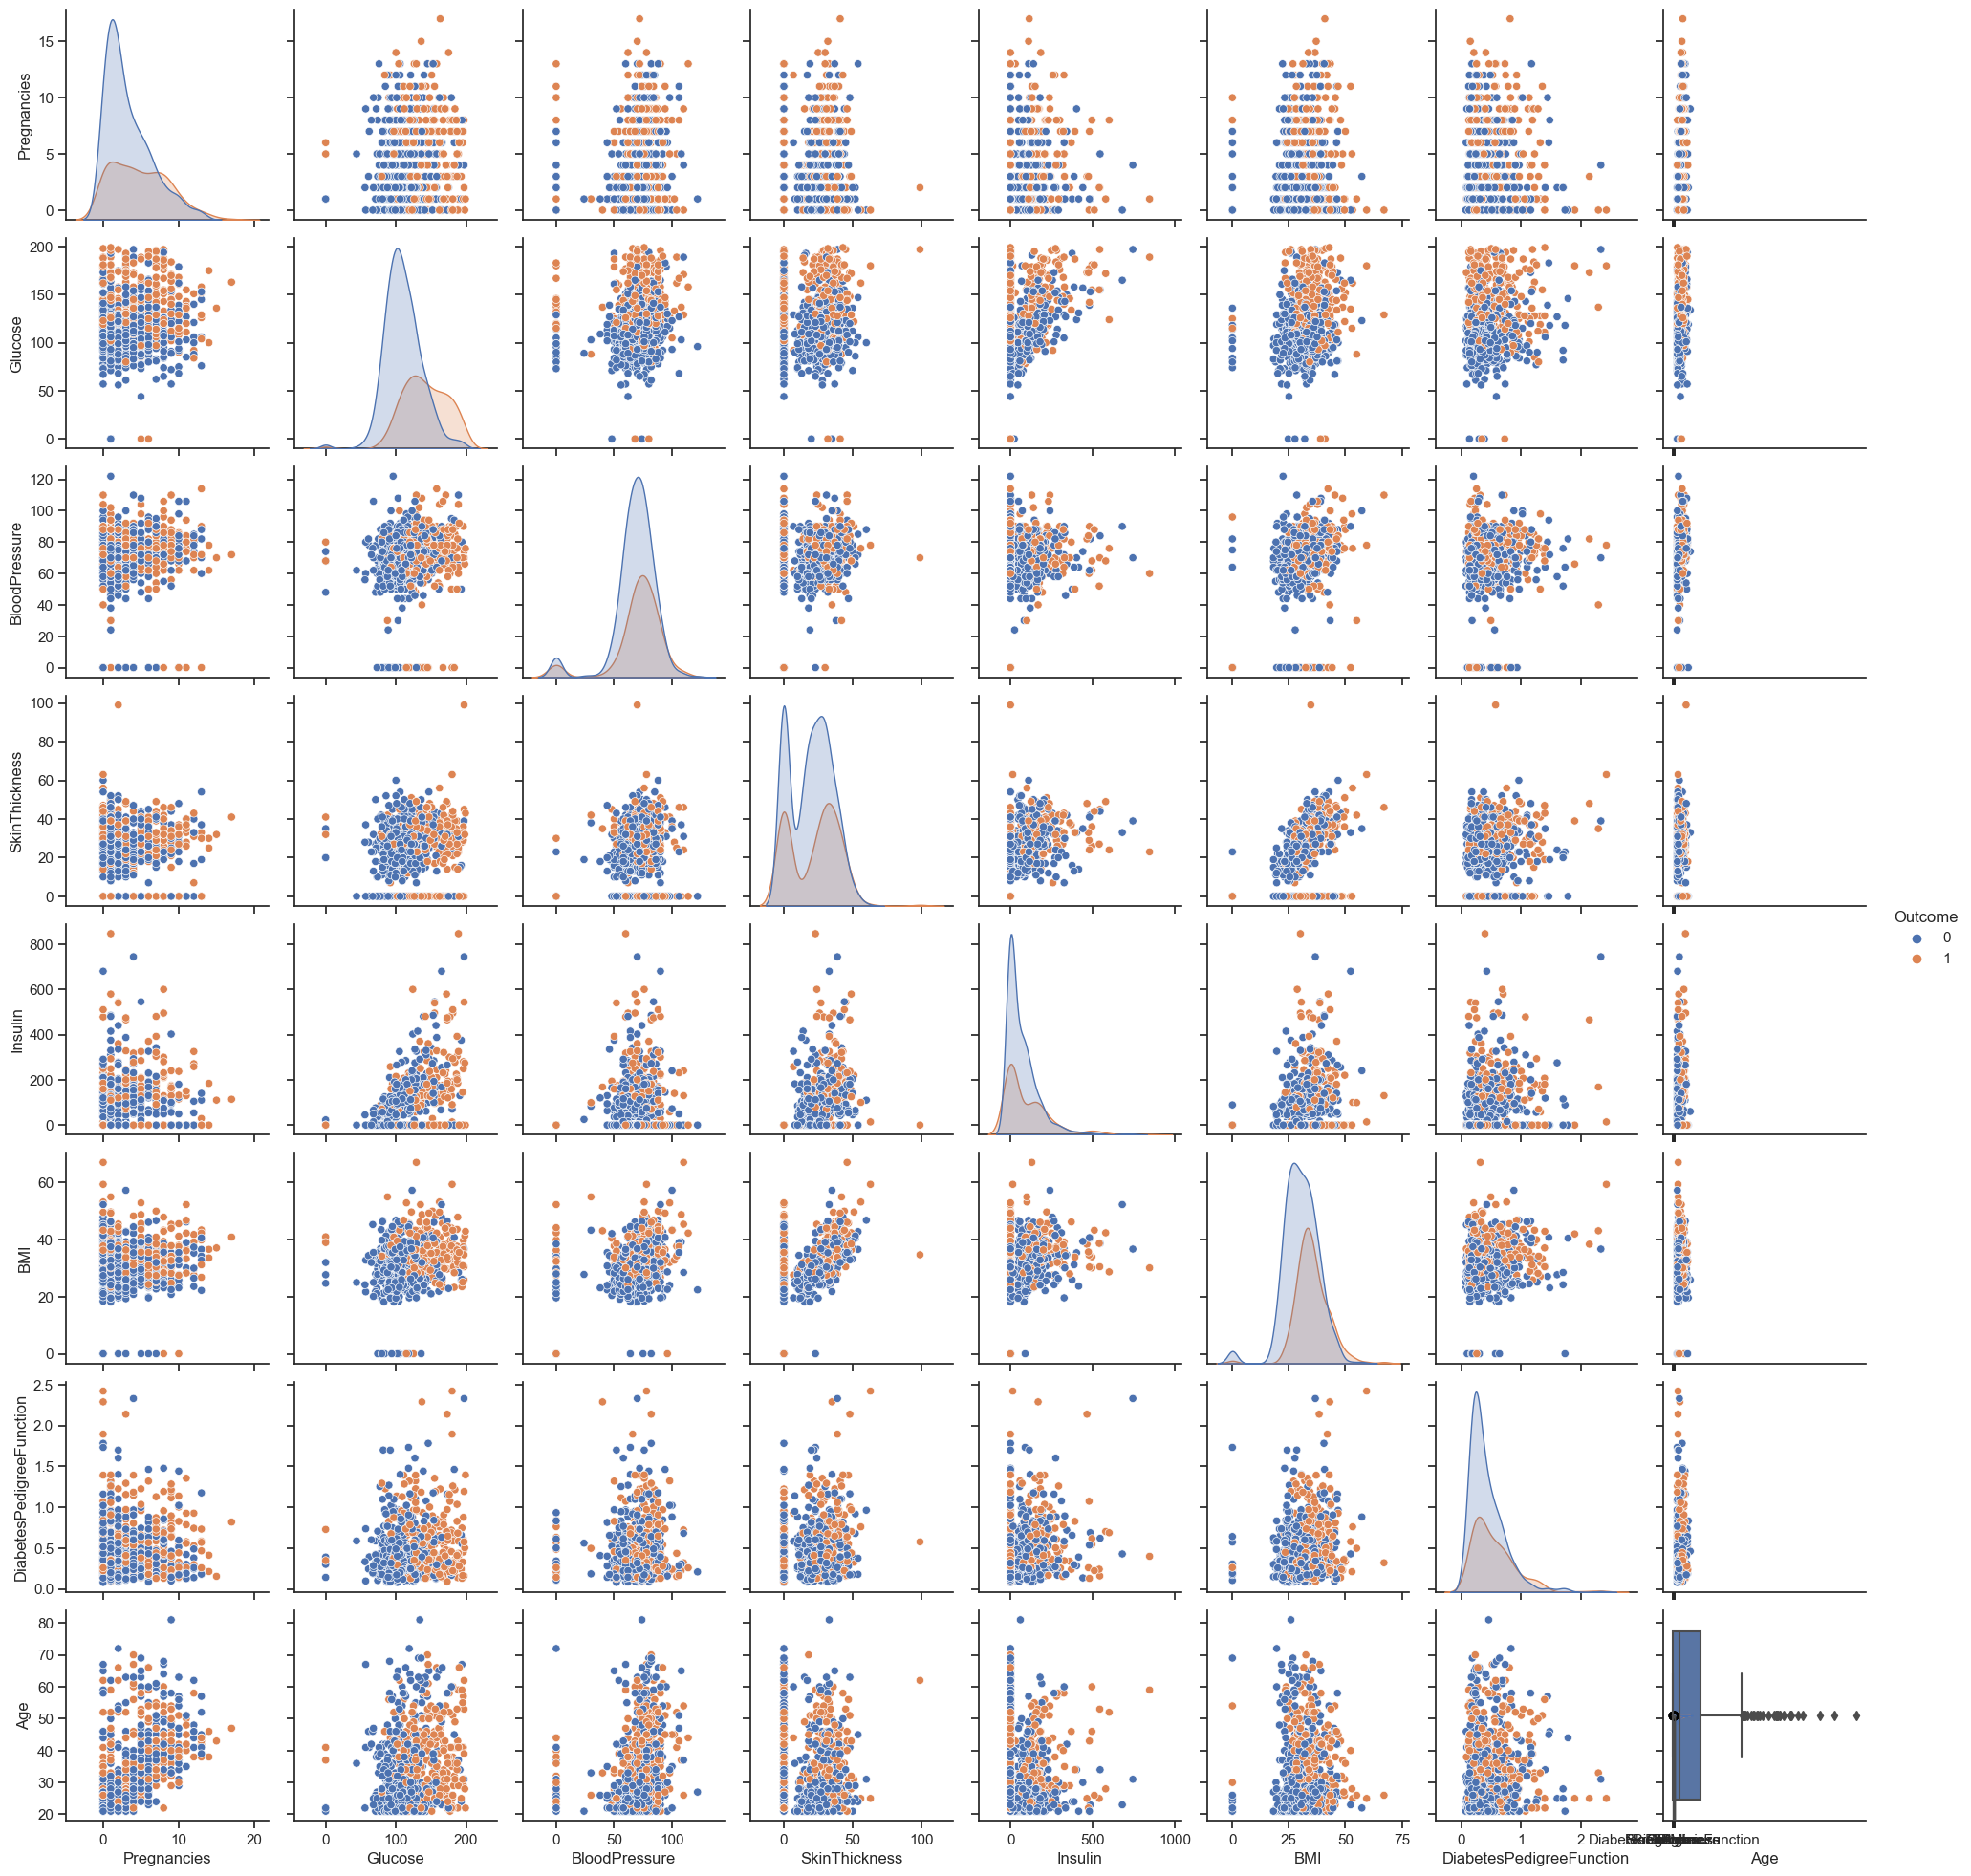

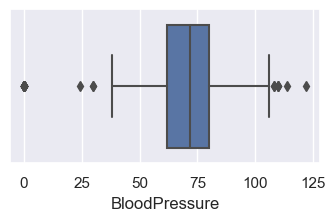

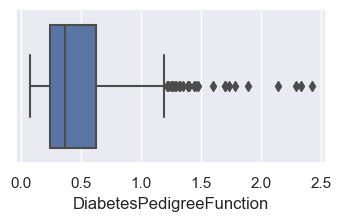

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

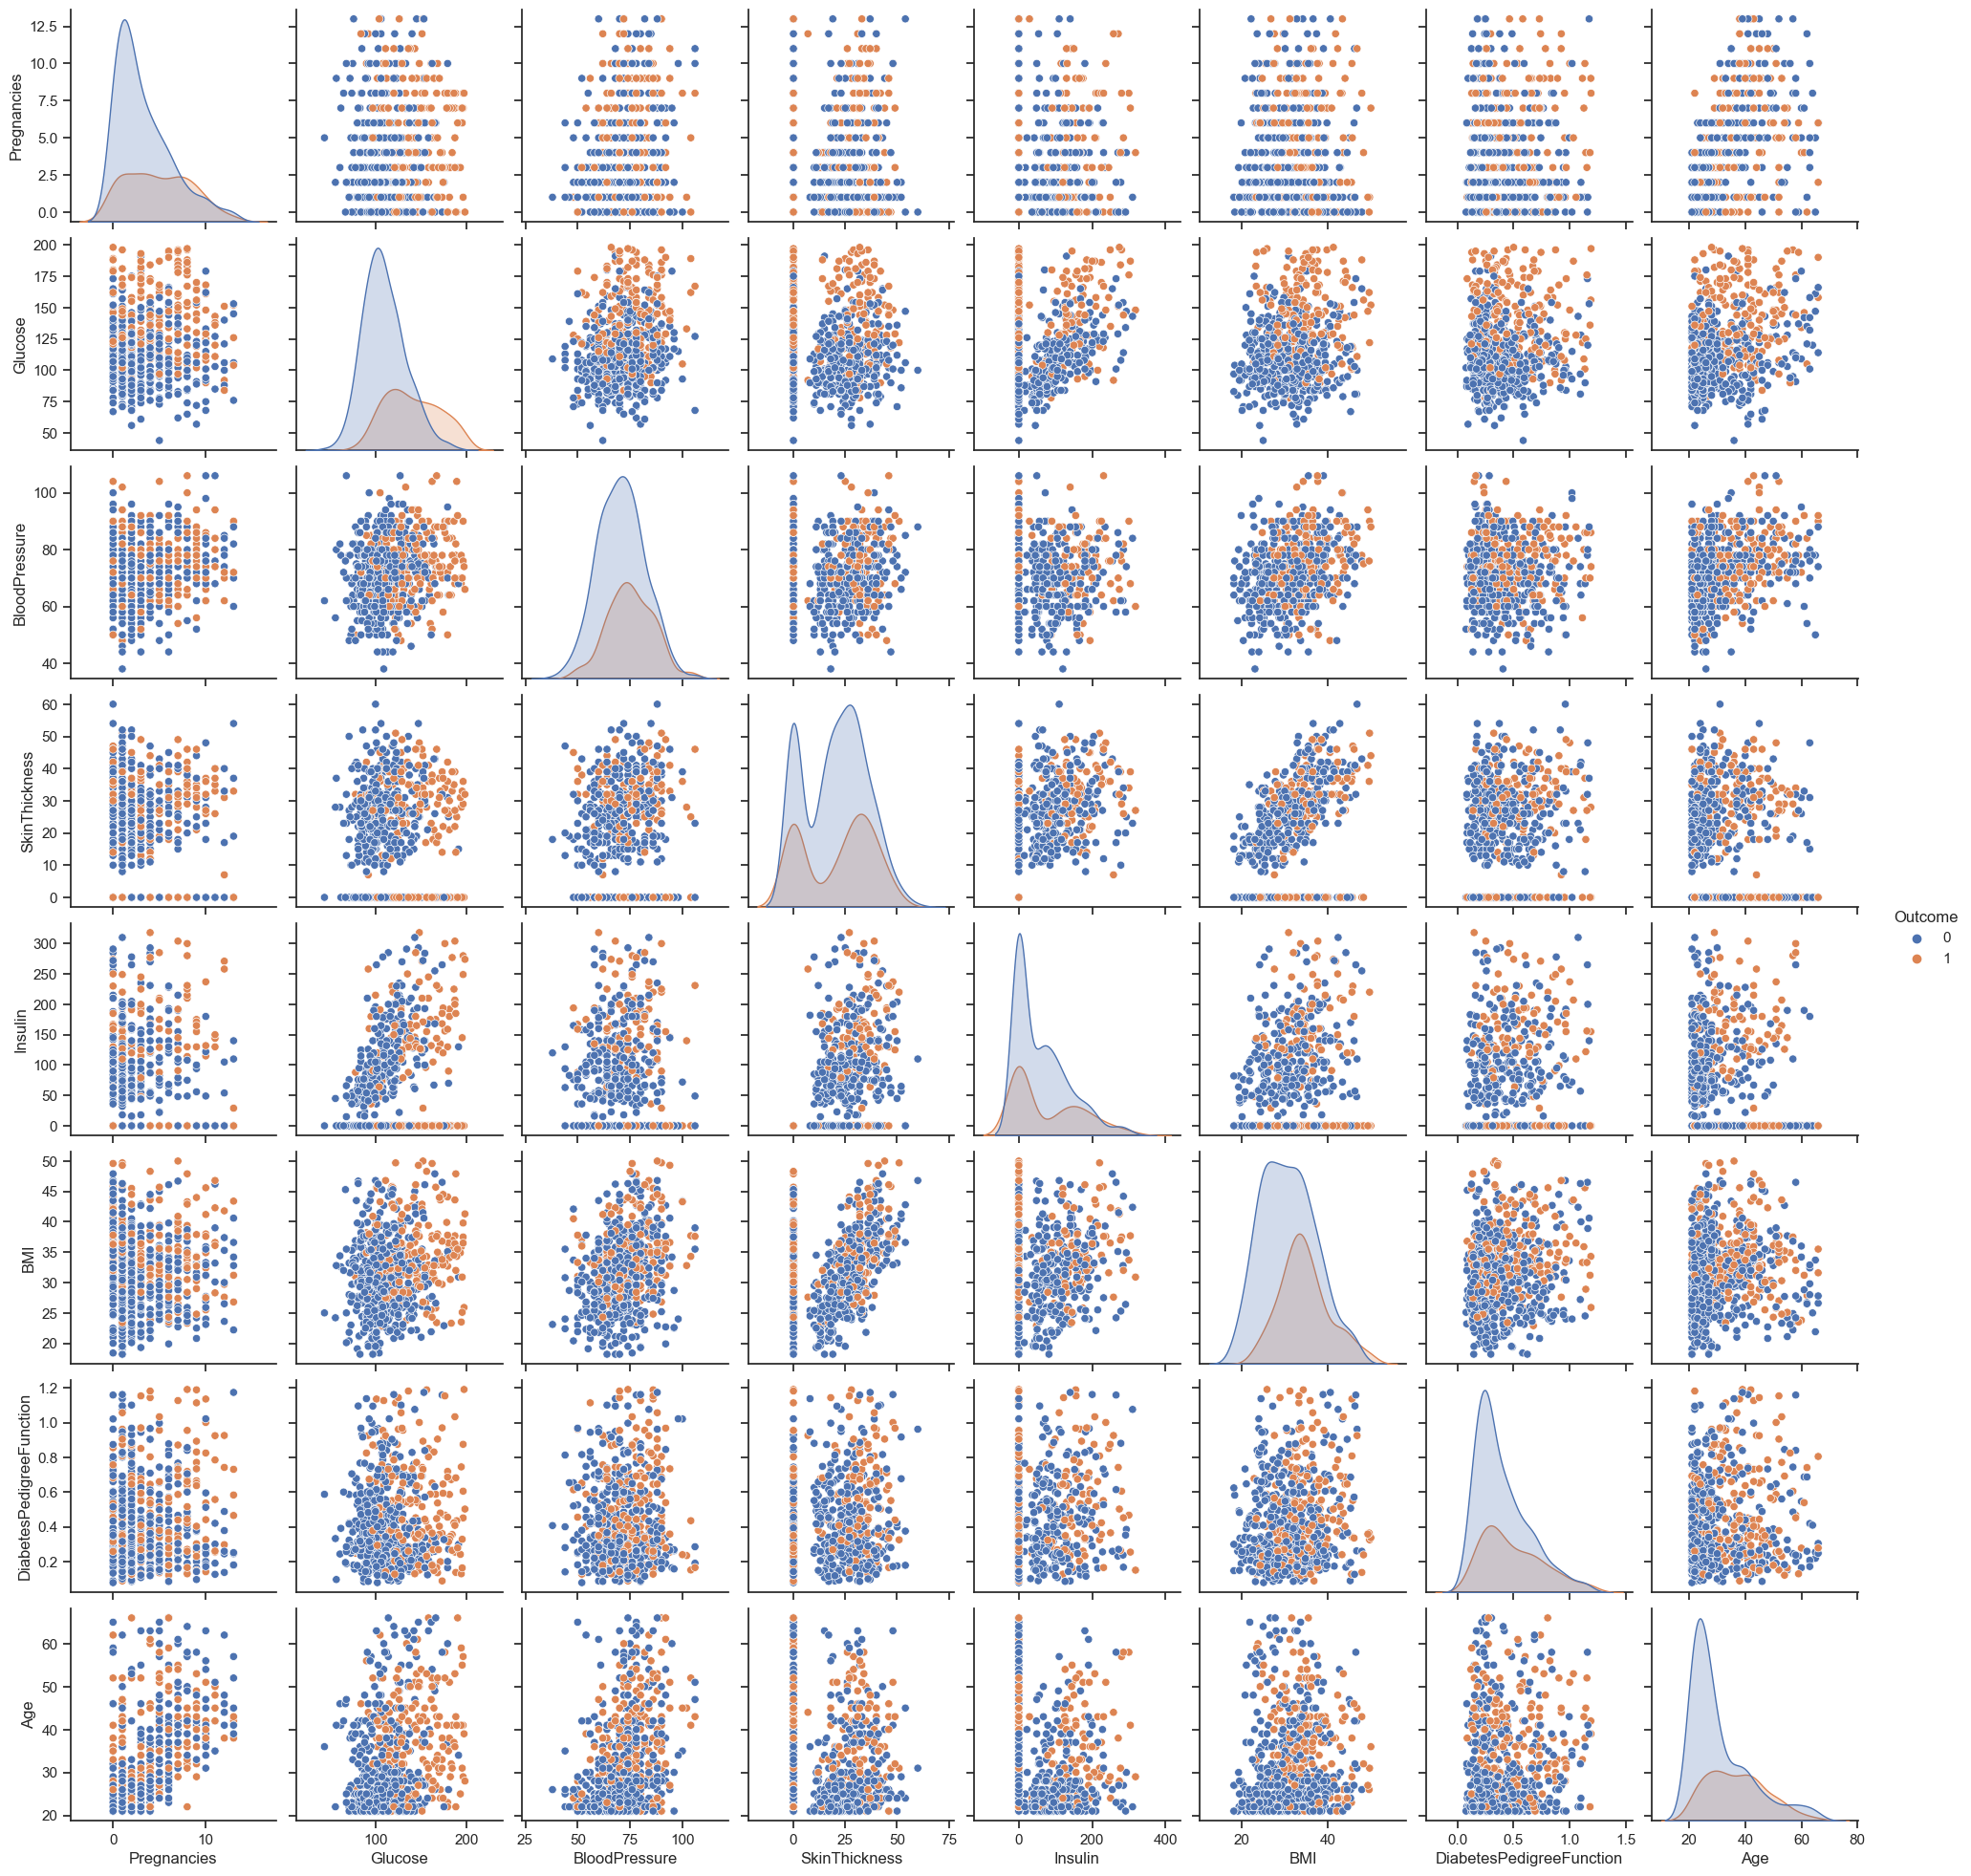

NameError: name 'acc' is not defined

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline
df=pd.read_csv('diabetes.csv')
df.head()
#lets describe the data
df.describe()
#infromation of dataset
df.info()
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()